In [1]:
import networkx as nx
import json
import matplotlib.pyplot as plt

from tqdm import tqdm
from collections import Counter

CUSTOM_FORMAT = {"with_labels" : False,
                "node_size": 20, "node_color": "#ff0000", "edgecolors": "#911a07",
                "width": 0.4, "edge_color": "black"}

# Load Data and Process

Load 'Proc Dependencies.json' and ask for dependencies of each packages.

In [17]:
with open("Proc Dependencies.json", "r") as f:
    deps = json.load(f)

proc_deps = {d["Name"]: d["Dependencies"] for d in deps}    

print(f"Loaded {len(proc_deps)} packages")

Loaded 398843 packages


# Topology Analysis

## Degree distribution

In [5]:
repeats = []
for deps in proc_deps.values():
    repeats += deps

deps_counts = dict(Counter(repeats))
deps_counts = dict(sorted(deps_counts.items(), key = lambda item: item[1], reverse=True))

hist = dict(sorted(dict(Counter(list(deps_counts.values()))).items(), key = lambda item: item[1], reverse=True))

Text(0, 0.5, 'Ocurrencias')

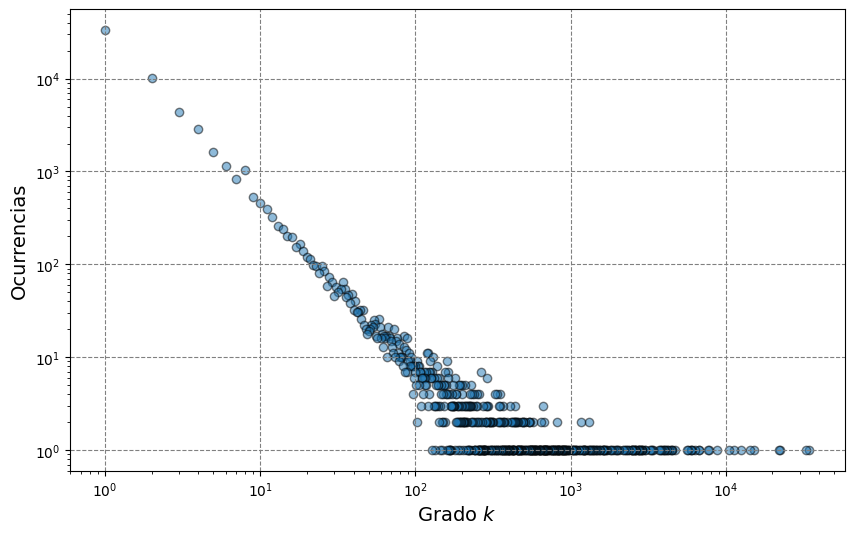

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
plt.scatter(hist.keys(), hist.values(), ec="black", alpha = 0.5)
plt.xscale("log")
plt.yscale("log")
plt.grid(color="gray", ls="--")
plt.xlabel("Grado $k$", fontsize=14)
plt.ylabel("Ocurrencias", fontsize=14)

In [29]:
edges = []
for p, deps in proc_deps.items():
    for d in deps:
        edges += [(p, d)]

G = nx.Graph()
G.add_nodes_from(proc_deps.keys())
G.add_edges_from(edges)
print(G)

nx.write_gexf(G, "PyPi Network.gexf") #Saves file for Gephi.

Graph with 405810 nodes and 883019 edges
